In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [3]:
df = pd.read_csv("Zomato data .csv")

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Converting Column Rate

In [5]:
def cleanrate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(cleanrate)

In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### Types of Restaurant

Text(0.5, 0, 'Type of Restaurant')

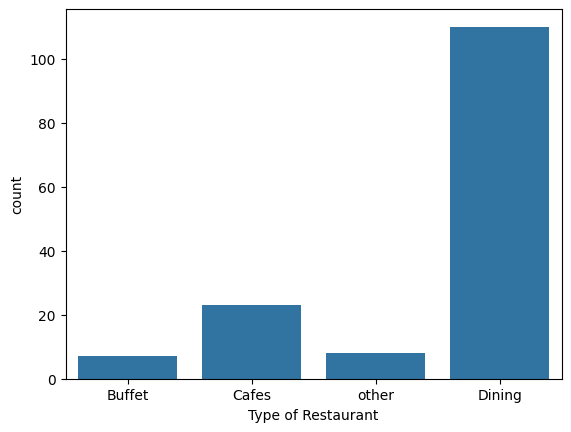

In [8]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

#### Most of the restaurants are of Dining Type

Text(0, 0.5, 'Votes')

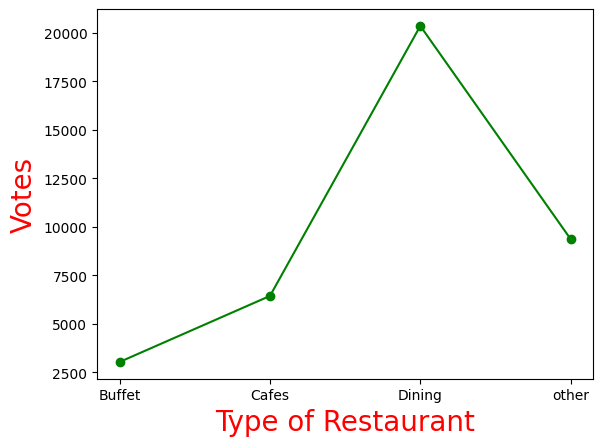

In [9]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
results = pd.DataFrame({'votes':grouped_data})
plt.plot(results, c = "green",marker="o")
plt.xlabel("Type of Restaurant", c= "red", size = 20)
plt.ylabel("Votes", c = "red", size = 20)

#### Dining has received maximum Votes

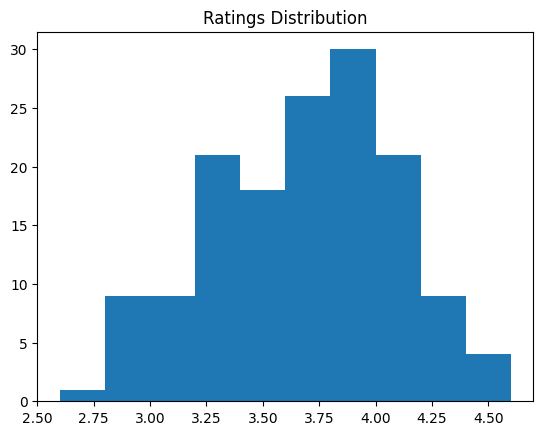

In [10]:
plt.hist(df['rate'], bins = 10)
plt.title("Ratings Distribution")
plt.show()

#### Most of the Restaurants are getting ratings between 3.50 to 4

### Avg Order Spendings by Couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

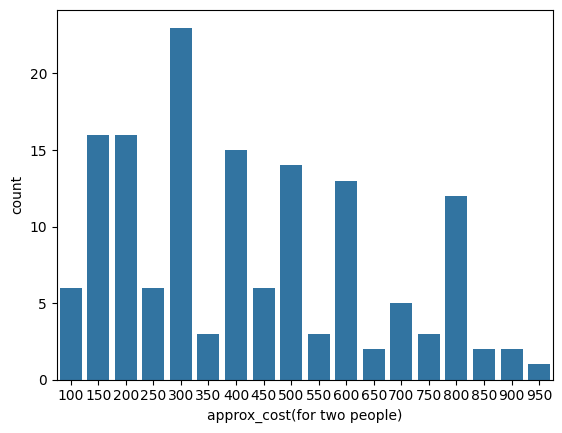

In [11]:
couples_data=df['approx_cost(for two people)']
sns.countplot(x=couples_data)


#### Majority of Couples prefer apprx cost of Rs.300

### Which Mode Received MAx Ratings

In [12]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

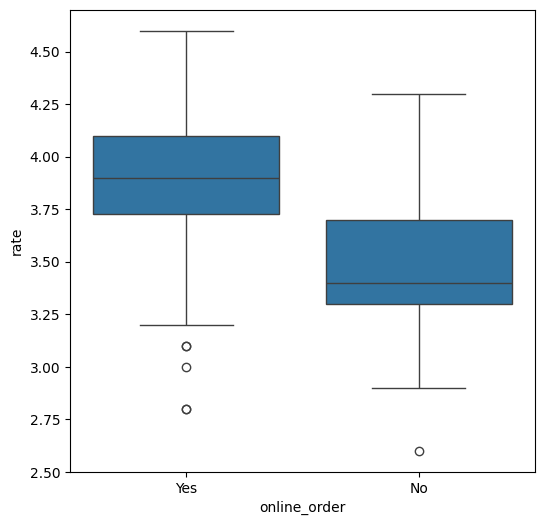

In [13]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

#### Online Orders gets better Ratings

In [14]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


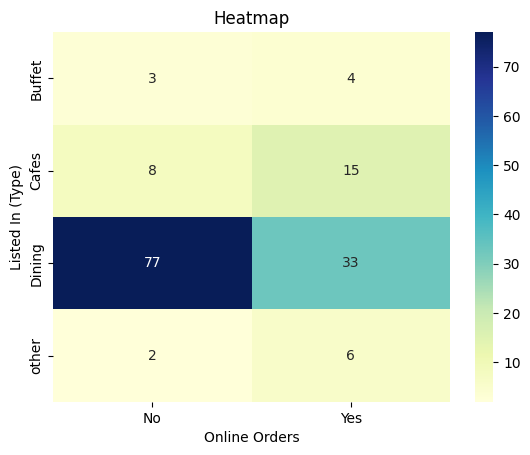

In [15]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = "YlGnBu", fmt = 'd')
plt.title("Heatmap")
plt.xlabel('Online Orders')
plt.ylabel('Listed In (Type)')
plt.show()


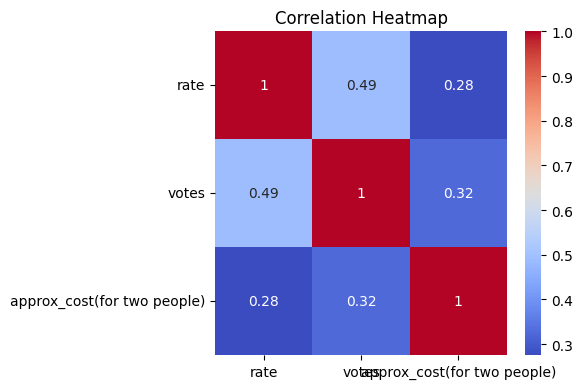

In [16]:
plt.figure(figsize=(6, 4))
corr = df[['rate', 'votes', 'approx_cost(for two people)', 'online_order', 'book_table']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


C:\Users\divsa\AppData\Local\Temp\ipykernel_18764\3986367923.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rate', y='name', data=top_restaurants, palette='viridis')


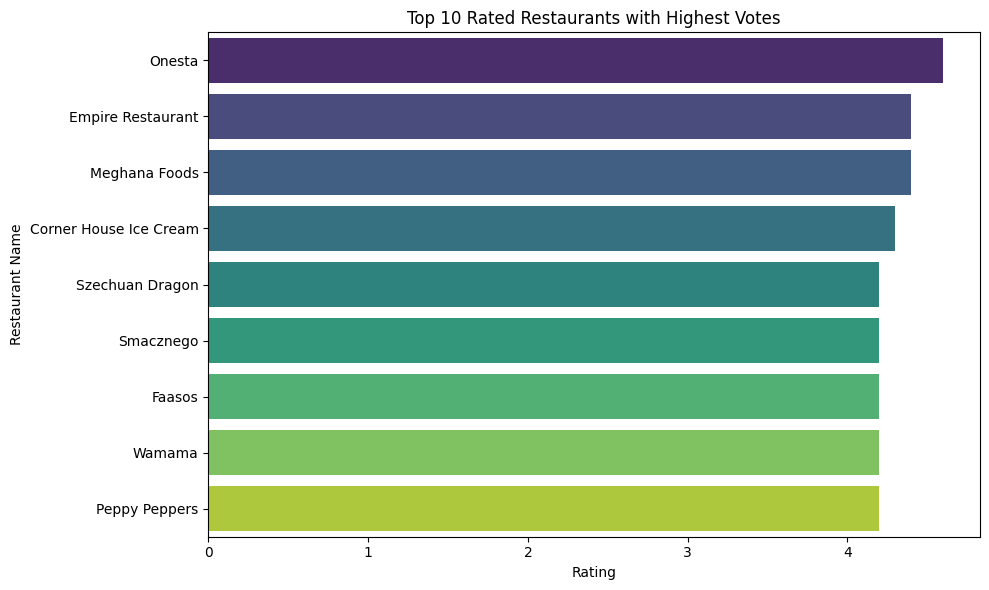

In [17]:
top_restaurants = df.sort_values(by=['rate', 'votes'], ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='rate', y='name', data=top_restaurants, palette='viridis')
plt.title("Top 10 Rated Restaurants with Highest Votes")
plt.xlabel("Rating")
plt.ylabel("Restaurant Name")
plt.tight_layout()
plt.show()


C:\Users\divsa\AppData\Local\Temp\ipykernel_18764\1399649281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='listed_in(type)', data=df, order=df['listed_in(type)'].value_counts().index, palette='magma')


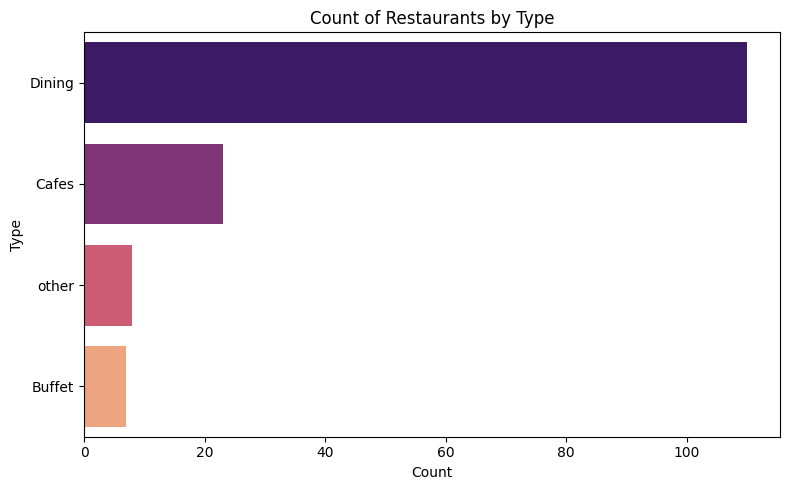

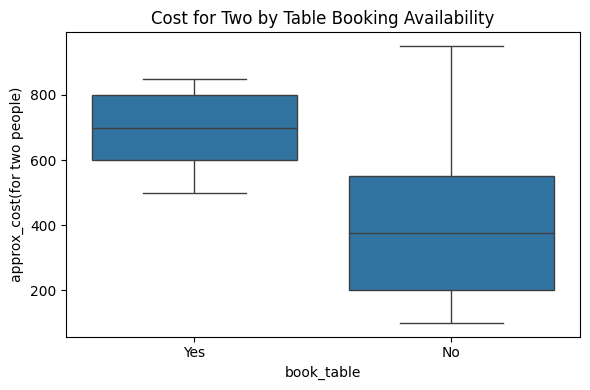

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='book_table', y='approx_cost(for two people)', data=df)
plt.title("Cost for Two by Table Booking Availability")
plt.tight_layout()
plt.show()
